In [2]:
import numpy as np
import pandas as pd
import os
import json
import shutil
from pymatgen.core.structure import Structure
from pymatgen.core.composition import Composition
import matplotlib.pyplot as plt
from pymatgen.analysis.structure_matcher import StructureMatcher

In [3]:
path="../data/cgcnn_junwen_oct_6_kdist/"
fig_folder="../figures/"

In [4]:
elements=pd.read_csv('../data/periodic_table.csv')

In [6]:
df=pd.read_pickle(os.path.join(path,'junwen_6_oct_no_structural_duplicates_kdist_with_supercell.pkl'))

In [7]:
df.head(3)

,File,source_db_id,Formula,MC3D mesh,medium k-mesh,well k-mesh,ultra k-mesh,medium_k_number,well_k_number,ultra_k_number,medium_k_distance,well_k_distance,ultra_k_distance,structure,density,k_dist
0,./S1320563/S1320563_v4.csv,S1320563,La1 Ag1 As2,"[11, 11, 4]","[7, 7, 3]",NaN,"[13, 13, 5]",20.0,NaN,84.0,0.254,NaN,0.127,"[[2.05806546 0. 2.49124624] La, [-1.26...",7.204742,0.117421
1,./22395/22395_v4.csv,22395,Na1 O3 Cl1,"[7, 7, 7]",NaN,NaN,"(2, 2, 2)",NaN,NaN,4.0,NaN,NaN,0.935,"[[2.90625486 6.26407245 3.80938032] Na, [6.264...",2.334300,0.467803
2,./S1825691/S1825691_v4.csv,S1825691,Ba1 S1 O4,"[8, 6, 5]","(2, 2, 1)",NaN,"(2, 2, 2)",4.0,NaN,8.0,0.863,NaN,0.698,"[[1.38932642 4.31802203 6.16723031] Ba, [4.171...",4.259571,0.564681


In [8]:
distribution_elements={}
for el in elements['element'].values:
    distribution_elements[el]=0

num_elements={}
for i in range(1,10):
    num_elements[i]=0

num_atoms=[]
for comp,struct in zip(df['Formula'].values,df['structure'].values):
    num_atoms.append(len(struct))
    comp=Composition(comp)
    num_elements[len(comp.elements)]+=1
    for el in comp.elements:
        distribution_elements[str(el)]+=1

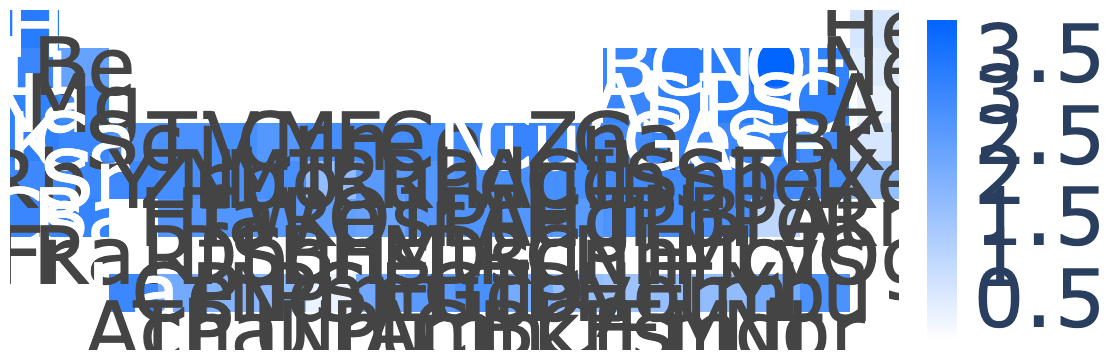

In [14]:
import numpy as np
import plotly.express as px
from collections import defaultdict
from pymatgen.core import Composition

def create_colorscale(c1, c2, n=50):
    """
    Return a Plotly colorscale from RGB tuples (0-255).
    """
    c1 = np.array(c1, dtype=float)
    c2 = np.array(c2, dtype=float)
    y = np.linspace(0, 1, n)
    scale = []
    for t in y:
        c = (1 - t) * c1 + t * c2
        scale.append([float(t), f"rgb({int(c[0])},{int(c[1])},{int(c[2])})"])
    return scale

# --- Periodic table (symbols & names) ----------------------------------------
# (Trailing spaces removed; superheavy element names updated)
symbol = [
    ['H',  '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   'He'],
    ['Li', 'Be', '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   'B',  'C',  'N',  'O',  'F',  'Ne'],
    ['Na', 'Mg', '',   '',   '',   '',   '',   '',   '',   '',   '',   '',   'Al', 'Si', 'P',  'S',  'Cl', 'Ar'],
    ['K',  'Ca', 'Sc', 'Ti', 'V',  'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr'],
    ['Rb', 'Sr', 'Y',  'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I',  'Xe'],
    ['Cs', 'Ba', '',   'Hf', 'Ta', 'W',  'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn'],
    ['Fr', 'Ra', '',   'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'],
    ['',   '',   'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', ''],
    ['',   '',   'Ac', 'Th', 'Pa', 'U',  'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', '']
]

element = [
    ['Hydrogen', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Helium'],
    ['Lithium', 'Beryllium', '', '', '', '', '', '', '', '', '', '', 'Boron', 'Carbon', 'Nitrogen', 'Oxygen', 'Fluorine', 'Neon'],
    ['Sodium', 'Magnesium', '', '', '', '', '', '', '', '', '', '', 'Aluminium', 'Silicon', 'Phosphorus', 'Sulfur', 'Chlorine', 'Argon'],
    ['Potassium', 'Calcium', 'Scandium', 'Titanium', 'Vanadium', 'Chromium', 'Manganese', 'Iron', 'Cobalt', 'Nickel',
     'Copper', 'Zinc', 'Gallium', 'Germanium', 'Arsenic', 'Selenium', 'Bromine', 'Krypton'],
    ['Rubidium', 'Strontium', 'Yttrium', 'Zirconium', 'Niobium', 'Molybdenum', 'Technetium', 'Ruthenium', 'Rhodium',
     'Palladium', 'Silver', 'Cadmium', 'Indium', 'Tin', 'Antimony', 'Tellurium', 'Iodine', 'Xenon'],
    ['Cesium', 'Barium', '', 'Hafnium', 'Tantalum', 'Tungsten', 'Rhenium', 'Osmium', 'Iridium', 'Platinum',
     'Gold', 'Mercury', 'Thallium', 'Lead', 'Bismuth', 'Polonium', 'Astatine', 'Radon'],
    ['Francium', 'Radium', '', 'Rutherfordium', 'Dubnium', 'Seaborgium', 'Bohrium', 'Hassium', 'Meitnerium',
     'Darmstadtium', 'Roentgenium', 'Copernicium', 'Nihonium', 'Flerovium', 'Moscovium', 'Livermorium', 'Tennessine', 'Oganesson'],
    ['', '', 'Lanthanum', 'Cerium', 'Praseodymium', 'Neodymium', 'Promethium', 'Samarium', 'Europium', 'Gadolinium',
     'Terbium', 'Dysprosium', 'Holmium', 'Erbium', 'Thulium', 'Ytterbium', 'Lutetium', ''],
    ['', '', 'Actinium', 'Thorium', 'Protactinium', 'Uranium', 'Neptunium', 'Plutonium', 'Americium', 'Curium',
     'Berkelium', 'Californium', 'Einsteinium', 'Fermium', 'Mendelevium', 'Nobelium', 'Lawrencium', '']
]

# --- Build the Z-matrix of counts aligned to periodic table -------------------
Z = []
for row in symbol:
    Z_row = []
    for sym in row:
        s = sym.strip()
        Z_row.append(distribution_elements[s] if s else 0)
    Z.append(Z)

# Oops—fix (the above accidentally appends Z to itself); correct version:
Z = []
for row in symbol:
    Z_row = []
    for sym in row:
        s = sym.strip()
        Z_row.append(distribution_elements[s] if s else 0)
    Z.append(Z_row)

Z = np.array(Z, dtype=float)
Z_log = np.log(Z+1)/np.log(10)

# Colorscale (white -> deep blue)
colorscale = create_colorscale((255, 255, 255), (0, 100, 255), n=50)

# --- Plot ---------------------------------------------------------------------
fig = px.imshow(
    Z_log,
    color_continuous_scale=colorscale,
    aspect="auto",
)

fig.update_traces(
    text=symbol,
    texttemplate="%{text}",
    textfont_size=80,
    customdata=element,
    hovertemplate=(
        "Symbol: %{text}<br>"
        "Name: %{customdata}<br>"
        "Count: %{z}<extra></extra>"
    ),
)

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.update_coloraxes(showscale=True)
fig.update_layout(
    font=dict(size=80),
    margin=dict(l=10, r=10, t=10, b=10),
)
fig.show()
fig.write_image(os.path.join(fig_folder,'element_representation.png'),width=15*300, height=10*300, scale=3)

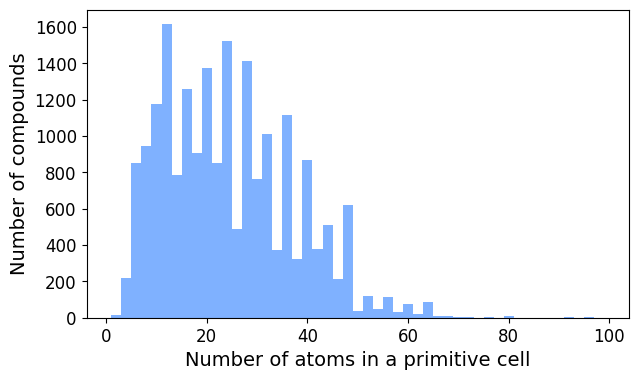

In [15]:
plt.figure(figsize=(7, 4))
plt.hist(num_atoms, bins=49, range=(1, 99), color=(0/255, 100/255, 255/255), alpha = 0.5)
plt.xlabel('Number of atoms in a primitive cell',fontsize=14)
plt.ylabel('Number of compounds',fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.savefig(os.path.join(fig_folder,'number_of_atoms.png'), dpi=600, bbox_inches='tight', transparent=False)
plt.show()

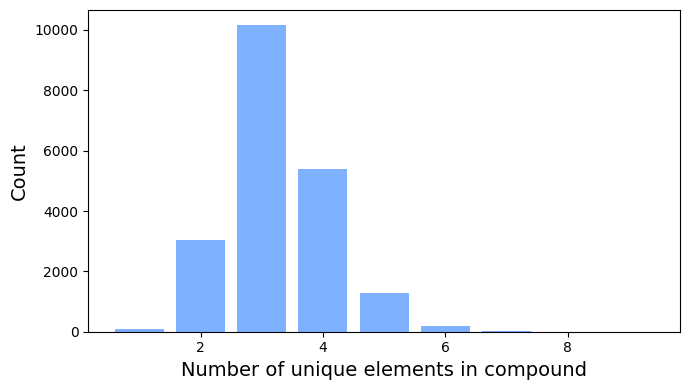

In [16]:
keys = list(num_elements.keys())
values = list(num_elements.values())

plt.figure(figsize=(7, 4))
# plt.bar(keys, values, color=(0/255, 100/255, 255/255), edgecolor='black', alpha=0.5)
plt.bar(keys, values, color=(0/255, 100/255, 255/255), alpha=0.5)
plt.xlabel("Number of unique elements in compound",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(fig_folder,'number_of_elements.png'), dpi=600, bbox_inches='tight', transparent=False)
plt.show()


In [17]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

bravais=[]
system=[]
spg=[]

system_abbr = {
        "triclinic": "a",
        "monoclinic": "m",
        "orthorhombic": "o",
        "tetragonal": "t",
        "trigonal": "h",
        "hexagonal": "h",
        "cubic": "c"
    }
for structure in df['structure'].values:
    analyzer = SpacegroupAnalyzer(structure)
    spg_symbol = analyzer.get_space_group_symbol()
    crystal_system = analyzer.get_crystal_system()
    centering = spg_symbol[0]
    brav = system_abbr[crystal_system] + centering
    if(brav == 'oA'):
        brav = 'oC'
    
    bravais.append(brav)
    system.append(analyzer.get_crystal_system())
    spg.append(analyzer.get_space_group_number())

df['bravais']=bravais
df['system']=system
df['spg']=spg

/opt/miniconda3/envs/kpoints/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:289: UserWarning:

No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.

/opt/miniconda3/envs/kpoints/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:289: UserWarning:

No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.



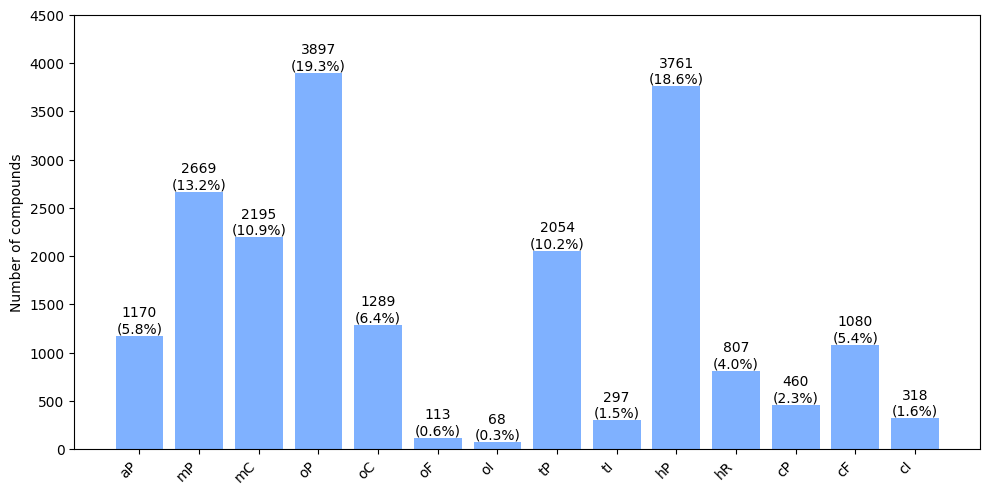

In [19]:
ser = (
    df["bravais"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

order = [
    "aP",
    "mP", "mC",
    "oP", "oC", "oF", "oI",
    "tP", "tI",
    "hP", 'hR',
    "cP", "cF", "cI",
]

counts = ser.value_counts()
perc = (ser.value_counts(normalize=True) * 100)

# Align to the chosen order (fill missing with 0)
plot_counts = counts.reindex(order).fillna(0).astype(int)
plot_perc = perc.reindex(order).fillna(0)

# --- 3) Plot ---
plt.figure(figsize=(10, 5))
bars = plt.bar(plot_counts.index, plot_counts.values, color=(0/255, 100/255, 255/255), alpha=0.5)
plt.ylabel("Number of compounds")
# plt.title("Distribution of compounds over Bravais lattices")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,4500)

# Add labels (count and %)
for rect, c, p in zip(bars, plot_counts.values, plot_perc.values):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        height,
        f"{c}\n({p:.1f}%)",
        ha="center",
        va="bottom"
    )
plt.savefig(os.path.join(fig_folder,'distribution_over_lattices.png'), dpi=600, bbox_inches='tight', transparent=False)
plt.show()

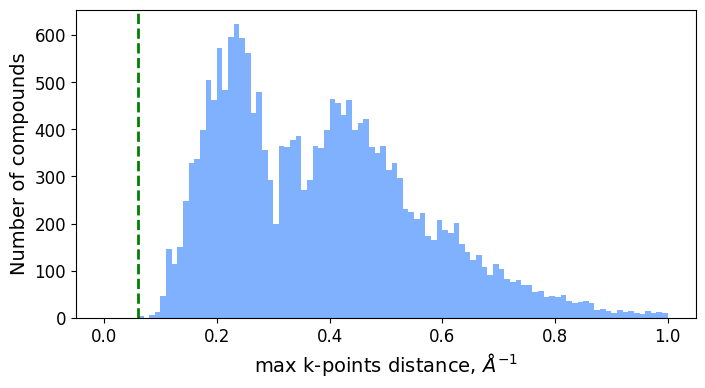

In [20]:
plt.figure(figsize=(8,4))
plt.hist(df['k_dist'].values, bins=100,range=(0,1),color=(0/255, 100/255, 255/255), alpha=0.5)

# plt.hist(y, bins=100,alpha=0.5)
plt.xlabel('max k-points distance, $\AA^{-1}$',fontsize=14)
plt.ylabel('Number of compounds',fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.axvline(x=0.06, color='green', linestyle='--', linewidth=2,
            label=r'$0.06\ \mathrm{\AA^{-1}}$')
plt.savefig(os.path.join(fig_folder,'k_dist_distribution.png'), dpi=600, bbox_inches='tight', transparent=False)
plt.show()

/var/folders/v7/cqz0y8fn2sjc927rqlt460_m0000gp/T/ipykernel_22980/82030582.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




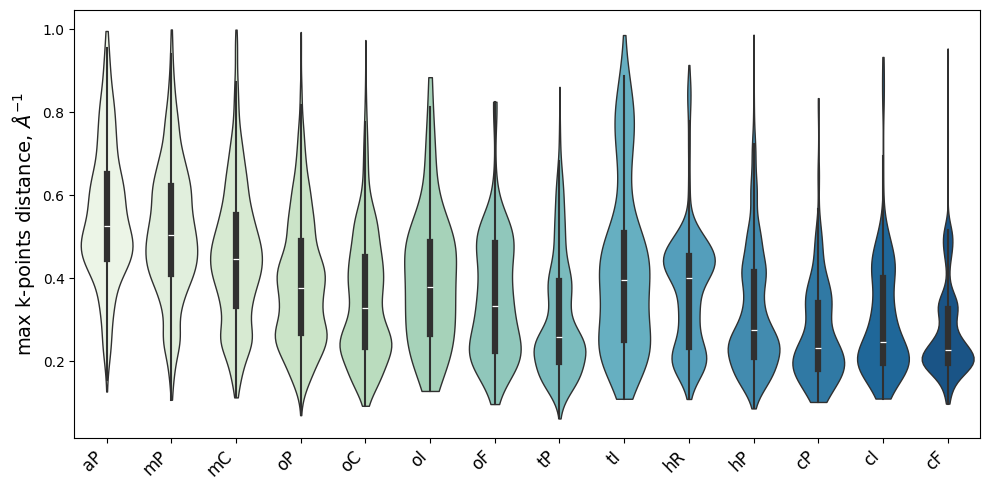

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

order = ["aP", "mP", "mC", "oP", "oC", "oI", "oF",
         "tP", "tI", "hR", "hP", "cP", "cI", "cF"]

plt.figure(figsize=(10,5))

sns.violinplot(
    data=df,
    x="bravais",
    y="k_dist",
    order=order,              # optional
    inner="box",              # show median and quartiles inside
    cut=0,                    # don't extend beyond data range
    linewidth=1,
    palette="GnBu"
)

plt.xlabel("", fontsize=14)
plt.ylabel("max k-points distance, $\AA^{-1}$", fontsize=14)
# plt.title("Distribution of k_dist by Bravais lattice")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(fig_folder,'violin_plot.png'), dpi=600, bbox_inches='tight', transparent=False)
plt.show()